In [19]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/diabetes.csv")
df.columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [20]:

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:

df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:

df.Outcome.value_counts()  #To check no. of people is suffering or not suffering from the diabetes


,count
Outcome,
0,500
1,268


In [23]:
#Train Test Split
X=df.drop("Outcome",axis="columns")
y=df.Outcome

In [24]:
#Lets use the Standardscaler so that the value didn't differ to much
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [25]:
#Let split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,stratify=y,random_state=10)

X_train.shape

X_test.shape

y_train.value_counts()#To check no. of people is suffering or not suffering from the diabetes in y train dataset


,count
Outcome,
0,375
1,201


In [26]:
#Lets first use without bagging decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Using the cross validation then store the score value in score obj then take the mean
scores=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
scores

scores.mean()

np.float64(0.7097614803497156)

In [37]:
# Commented out IPython magic to ensure Python compatibility.
# Plot display in notebook
%matplotlib inline

# Basic info
print("\nDataset shape:", df.shape)
print("\nData types and non-null counts:")
df.info()


Dataset shape: (768, 9)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split


# Display column names to verify target column
print("Column names in the dataset:")
print(df.columns.tolist())  # Show all column names clearly

# If the dataset includes an 'id' column, drop it as it's not a feature
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Confirm that 'cardio' is the correct target column (from the dataset description)
# If this column exists, proceed; else, update the column name as needed
target_column = 'cardio'

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine for display
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Display the first few rows of train and test datasets
print("\nTrain Dataset:")
display(train_data.head())

print("\nTest Dataset:")
display(test_data.head())


Column names in the dataset:
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Train Dataset:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
47339,21876,1,154,80.0,130,90,2,1,0,0,1,1
67456,16717,2,162,70.0,140,90,1,1,0,0,0,1
12308,21128,2,174,92.0,150,100,1,1,0,0,1,1
32557,23366,2,173,76.0,120,82,1,1,0,0,1,1
664,20281,1,160,60.0,120,80,1,1,0,0,1,0



Test Dataset:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,21770,1,156,64.0,140,80,2,1,0,0,1,1
48393,21876,1,170,85.0,160,90,1,1,0,0,1,1
41416,23270,1,151,90.0,130,80,1,1,0,0,1,1
34506,19741,1,159,97.0,120,80,1,1,0,0,1,1
43725,18395,1,164,68.0,120,80,1,1,0,0,1,0


In [46]:


# Drop 'id' column if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Define target column
target_column = 'cardio'

# Split into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Predict on train and test
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")


Training Accuracy: 0.7056
Testing Accuracy:  0.7113


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


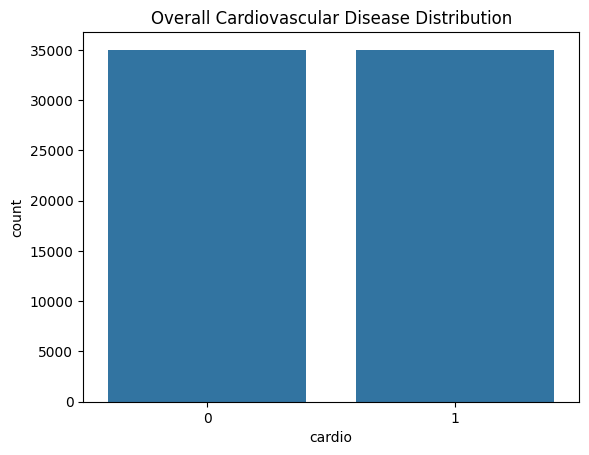

In [48]:
# 4. Target distribution
sns.countplot(x='cardio', data=df)
plt.title("Overall Cardiovascular Disease Distribution")
plt.show()

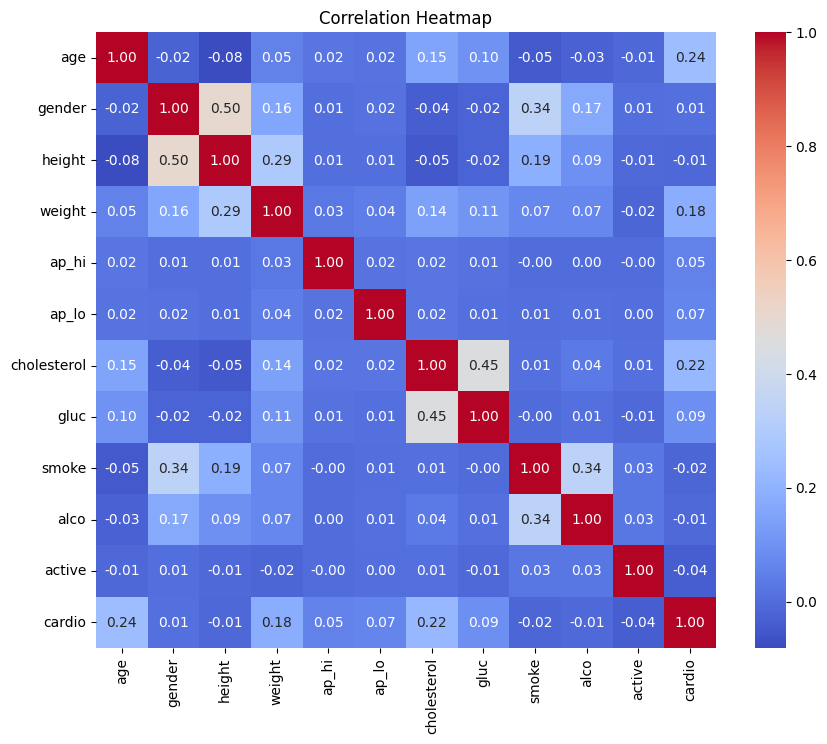

In [49]:
# 5. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

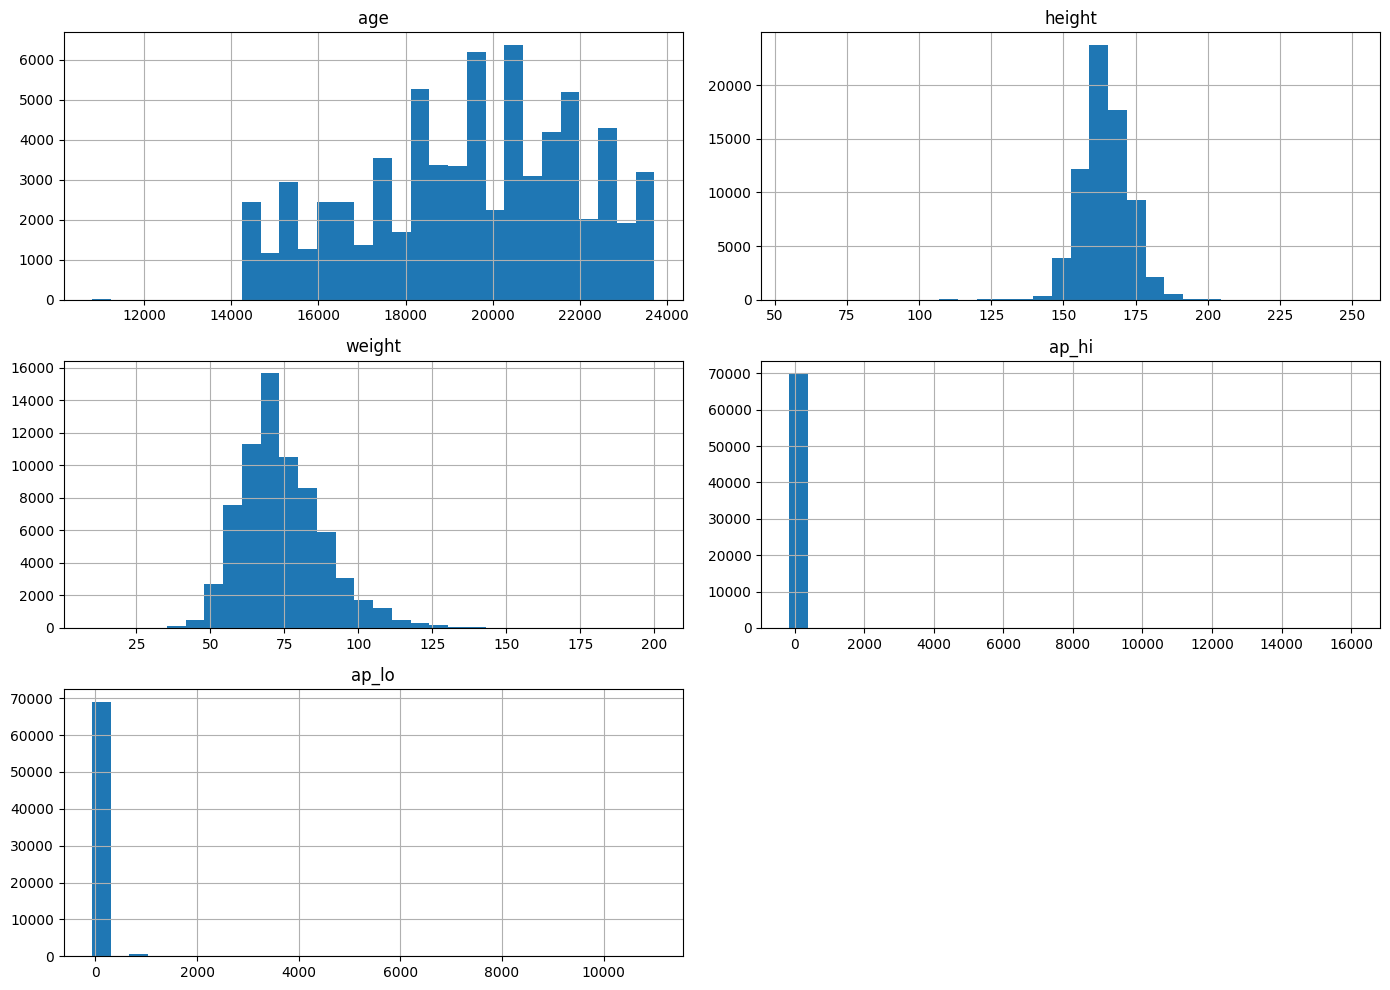

In [50]:
# 6. Histograms of selected features
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

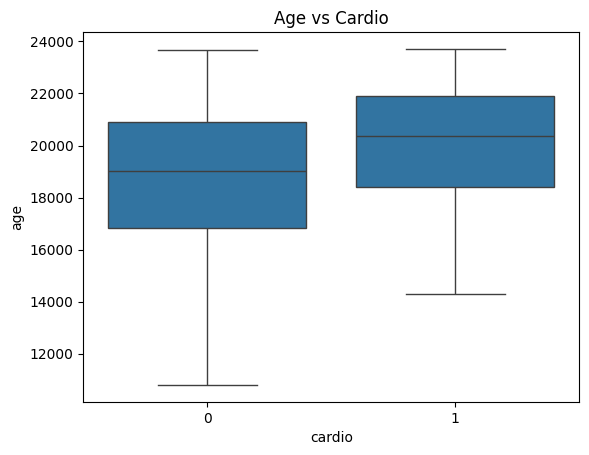

In [51]:
# 7. Boxplot of age vs cardio
sns.boxplot(x='cardio', y='age', data=df)
plt.title("Age vs Cardio")
plt.show()

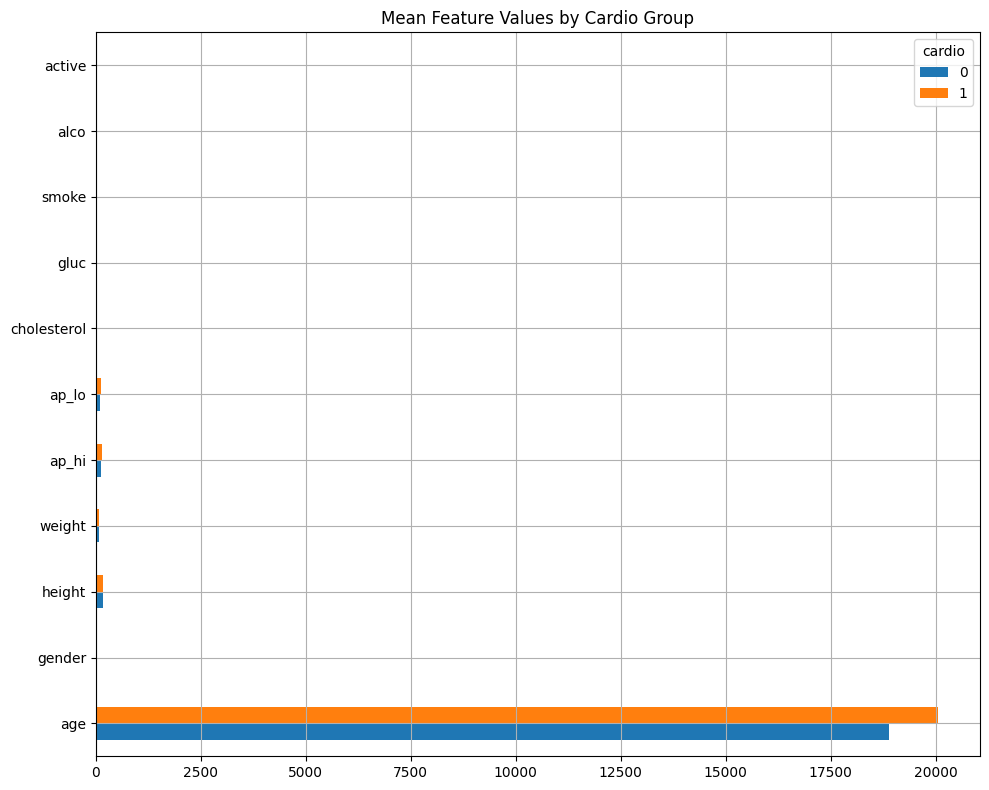

In [52]:

# 8. Grouped means by cardio
grouped = df.groupby('cardio').mean().T
grouped.plot(kind='barh', figsize=(10, 8))
plt.title("Mean Feature Values by Cardio Group")
plt.grid(True)
plt.tight_layout()
plt.show()